Using device: cpu

SECTION 3.1: MLP EXPERIMENTS


100%|██████████| 9.91M/9.91M [00:00<00:00, 133MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 34.5MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 124MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.16MB/s]
100%|██████████| 26.4M/26.4M [00:01<00:00, 21.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 342kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.25MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.21MB/s]



Training Baseline Models

Training Random Forest...
Training Logistic Regression...

Training MLP
Epoch [1/10], Loss: 1.2212, Accuracy: 64.94%
Epoch [2/10], Loss: 0.4499, Accuracy: 87.62%
Epoch [3/10], Loss: 0.3389, Accuracy: 90.19%
Epoch [4/10], Loss: 0.2939, Accuracy: 91.66%
Epoch [5/10], Loss: 0.2709, Accuracy: 91.98%
Epoch [6/10], Loss: 0.2459, Accuracy: 92.64%
Epoch [7/10], Loss: 0.2229, Accuracy: 93.48%
Epoch [8/10], Loss: 0.2082, Accuracy: 94.01%
Epoch [9/10], Loss: 0.1907, Accuracy: 94.34%
Epoch [10/10], Loss: 0.1761, Accuracy: 94.78%

MODEL COMPARISON

Random Forest Results:
Accuracy: 0.9515
F1-Score: 0.9514

Logistic Regression Results:
Accuracy: 0.8843
F1-Score: 0.8840

MLP Results:
Accuracy: 0.9289
F1-Score: 0.9288


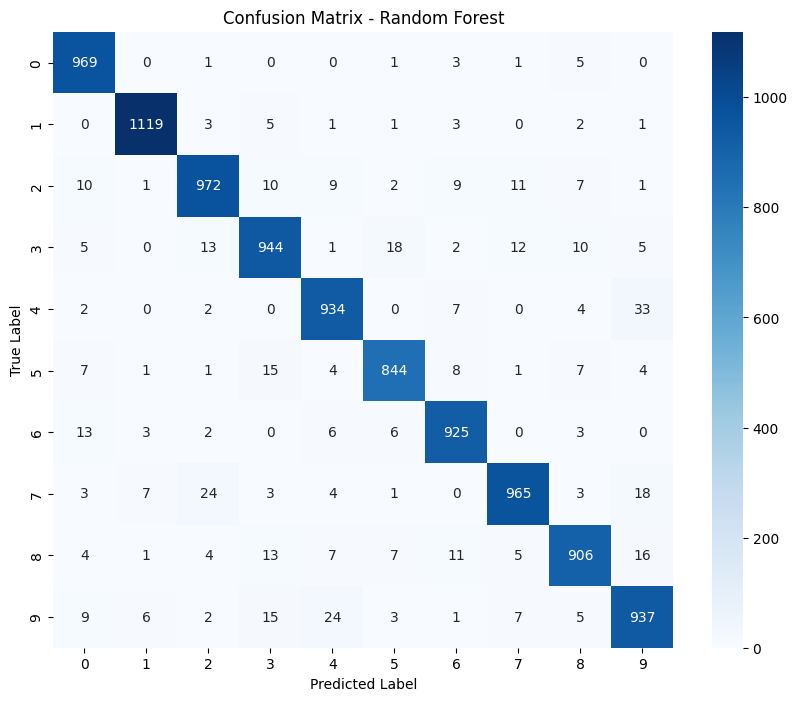

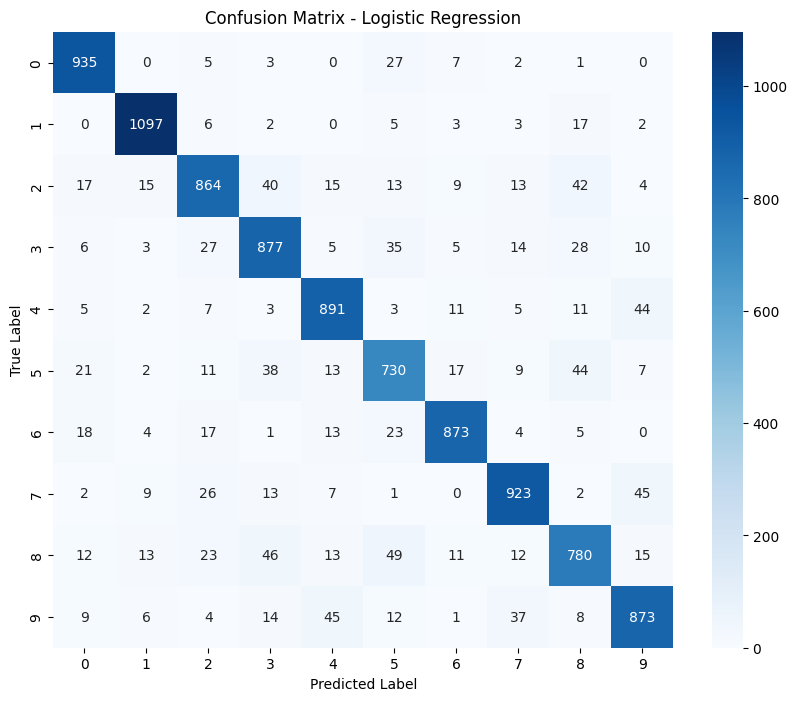

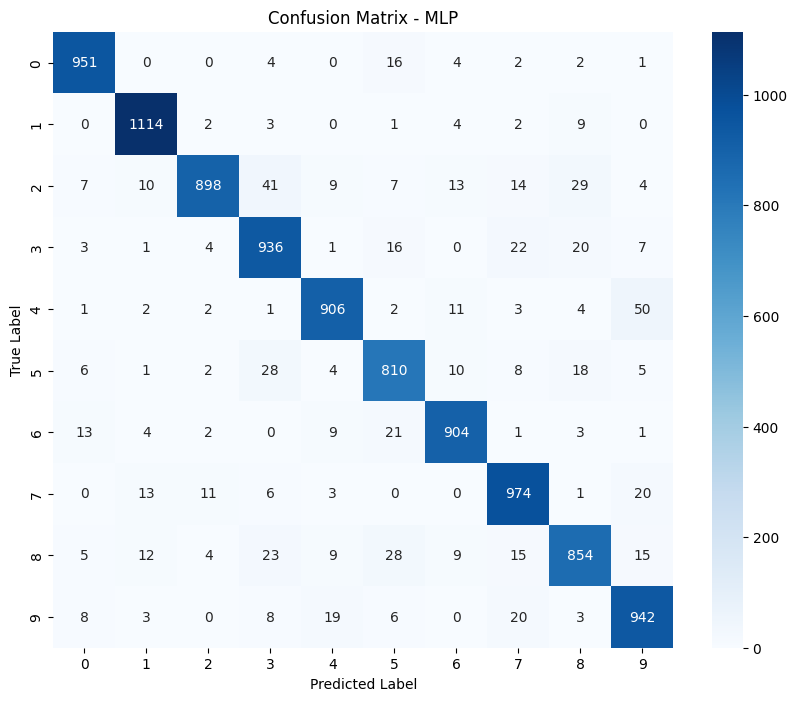


Computing t-SNE for t-SNE of Trained MLP (20-neuron layer)...


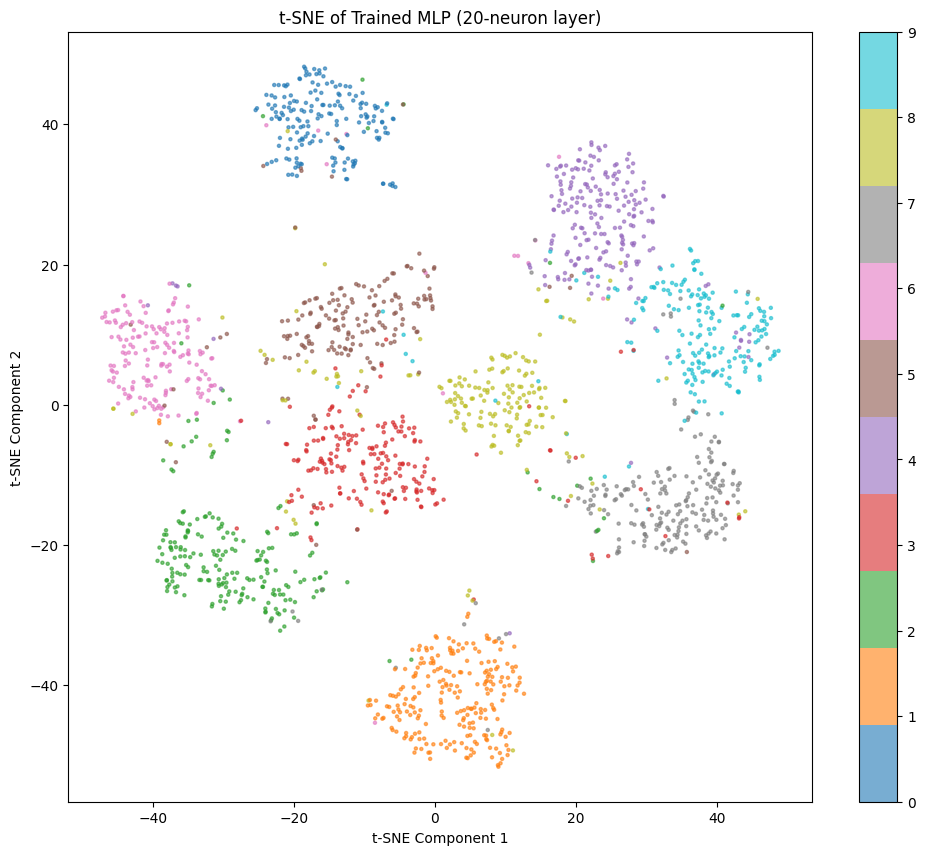


Computing t-SNE for t-SNE of Untrained MLP (20-neuron layer)...


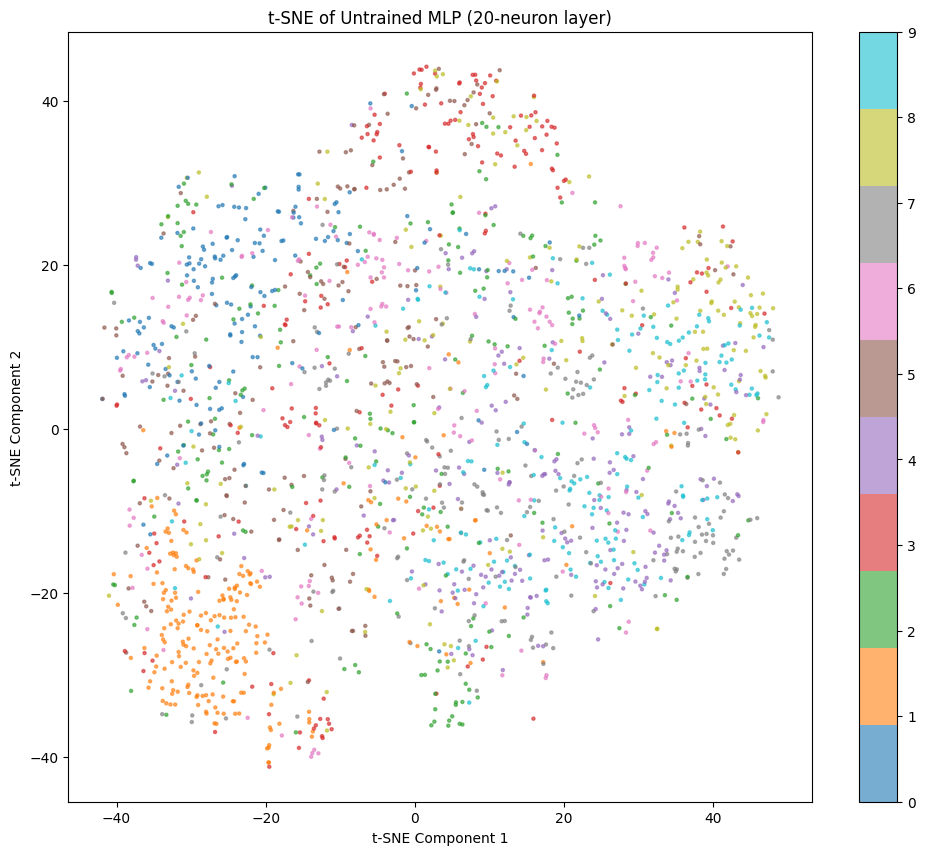


Testing MLP on Fashion-MNIST

MLP on Fashion-MNIST Results:
Accuracy: 0.0857
F1-Score: 0.0534


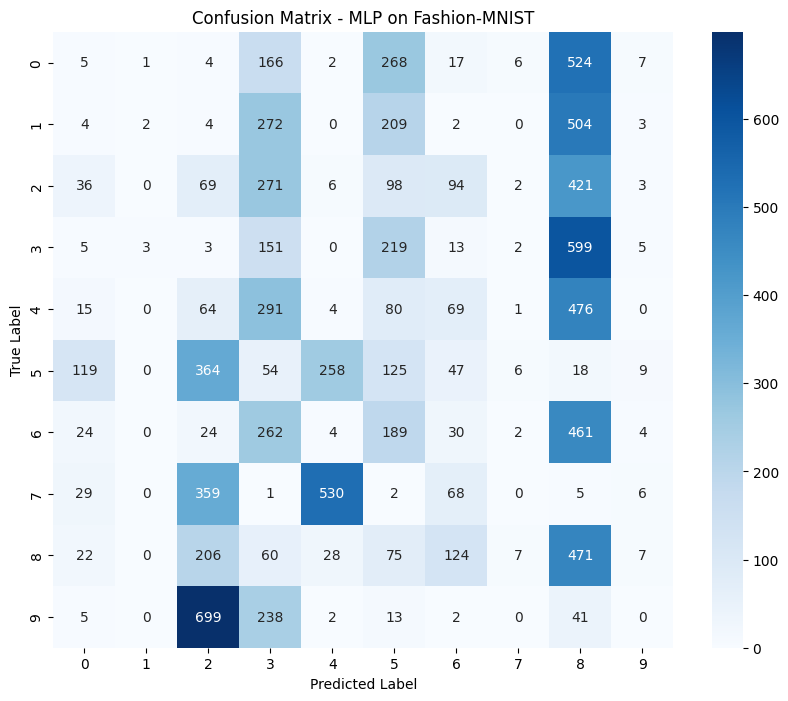


Computing t-SNE for t-SNE of MLP on Fashion-MNIST (20-neuron layer)...


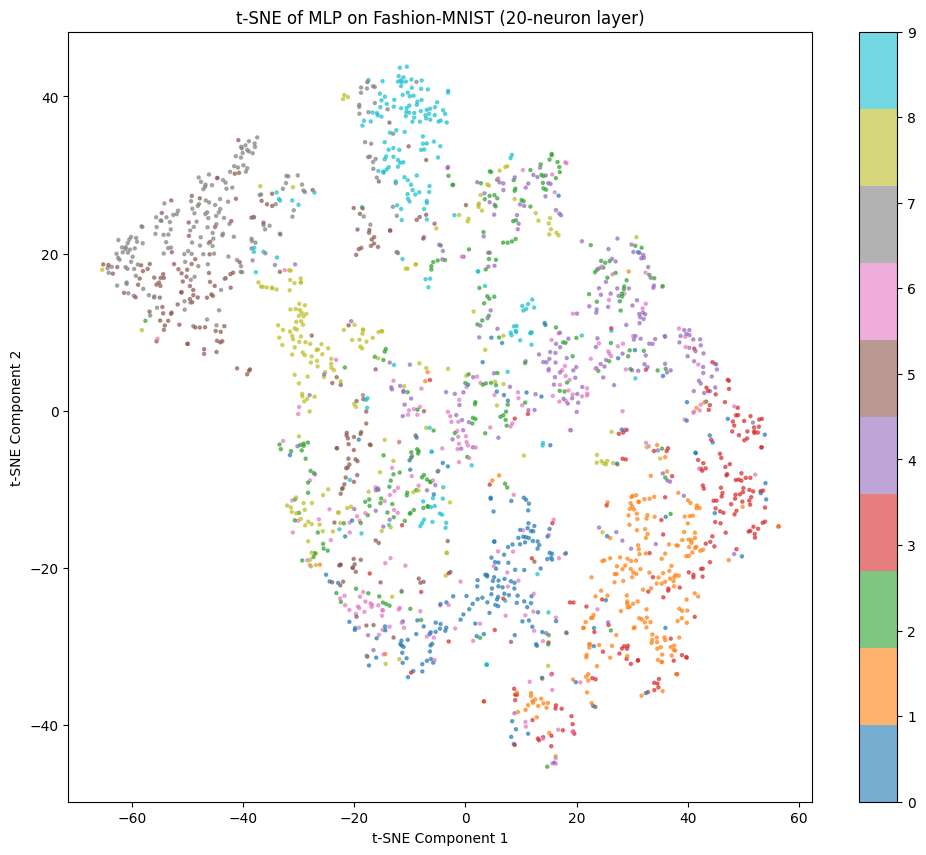


SECTION 3.2: CNN EXPERIMENTS

Training Simple CNN...
Epoch [1/10], Loss: 0.4957, Accuracy: 85.03%
Epoch [2/10], Loss: 0.1935, Accuracy: 94.24%
Epoch [3/10], Loss: 0.1297, Accuracy: 96.05%
Epoch [4/10], Loss: 0.0947, Accuracy: 97.01%
Epoch [5/10], Loss: 0.0656, Accuracy: 98.11%
Epoch [6/10], Loss: 0.0510, Accuracy: 98.41%
Epoch [7/10], Loss: 0.0318, Accuracy: 99.22%
Epoch [8/10], Loss: 0.0287, Accuracy: 99.37%
Epoch [9/10], Loss: 0.0328, Accuracy: 99.02%
Epoch [10/10], Loss: 0.0143, Accuracy: 99.68%

Loading Pretrained CNNs...
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 90.8MB/s]


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 108MB/s]



Fine-tuning MobileNetV2...
Epoch [1/5], Loss: 1.0055, Accuracy: 68.49%
Epoch [2/5], Loss: 0.2892, Accuracy: 91.31%
Epoch [3/5], Loss: 0.1532, Accuracy: 95.59%
Epoch [4/5], Loss: 0.1034, Accuracy: 96.99%
Epoch [5/5], Loss: 0.0760, Accuracy: 98.31%

Fine-tuning ResNet18...
Epoch [1/5], Loss: 1.0073, Accuracy: 66.78%
Epoch [2/5], Loss: 0.2385, Accuracy: 92.42%
Epoch [3/5], Loss: 0.1189, Accuracy: 96.46%
Epoch [4/5], Loss: 0.0615, Accuracy: 98.36%
Epoch [5/5], Loss: 0.0444, Accuracy: 98.72%

CNN MODEL COMPARISON

Simple CNN Results:
Accuracy: 0.9734
F1-Score: 0.9733

MobileNetV2 Results:
Accuracy: 0.9487
F1-Score: 0.9487

ResNet18 Results:
Accuracy: 0.9510
F1-Score: 0.9509


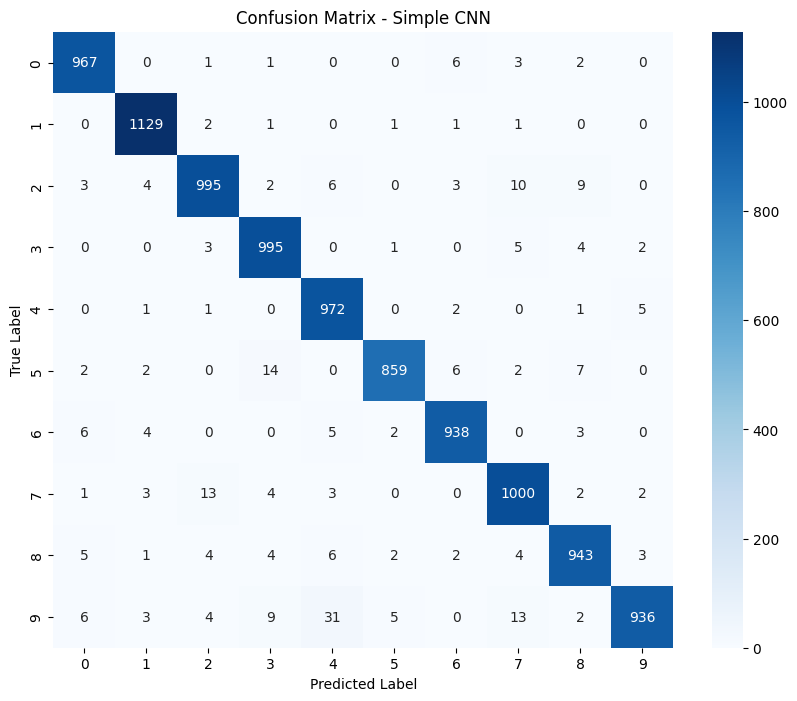

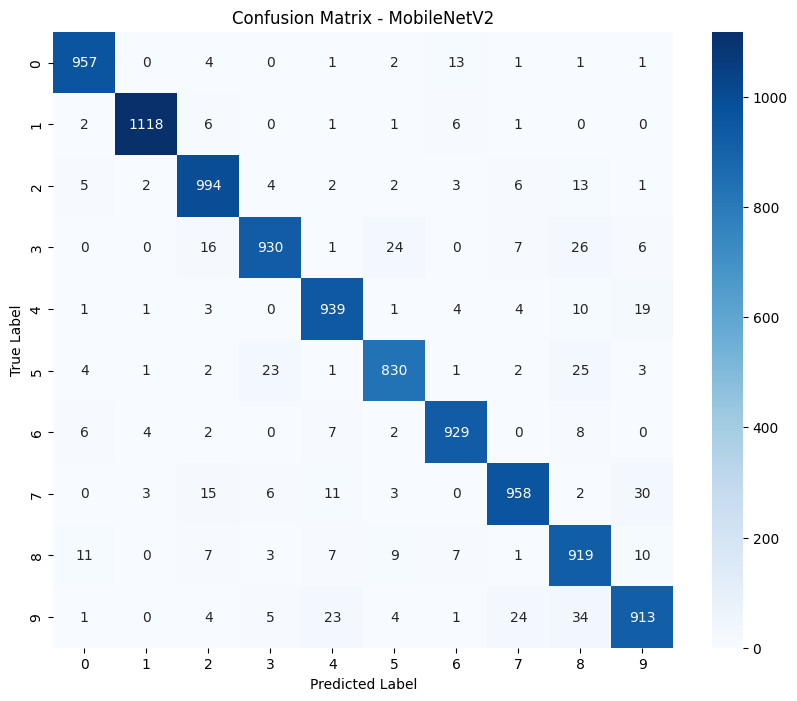

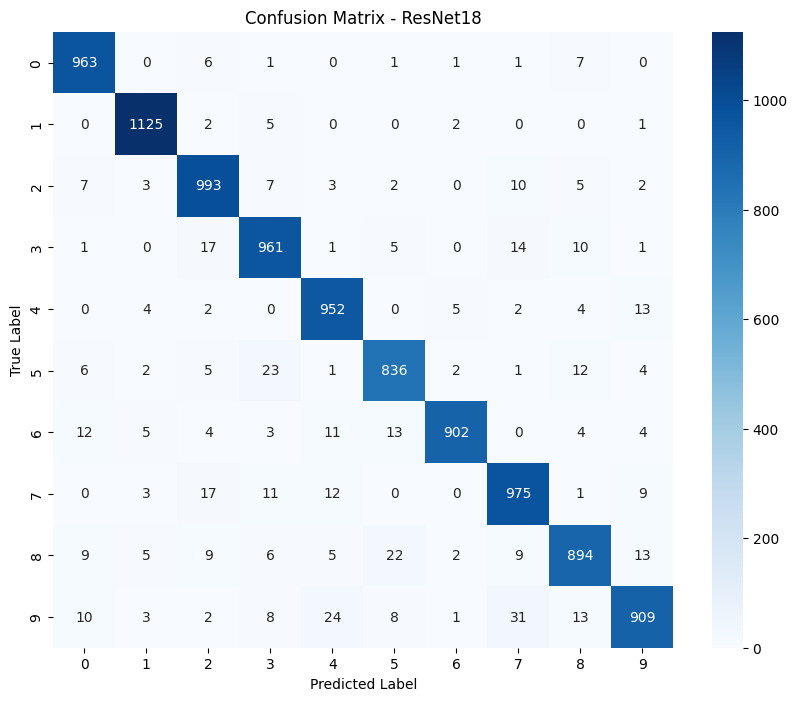


MODEL SIZE COMPARISON
Simple CNN Parameters: 804,554
MobileNetV2 Parameters: 2,236,106
ResNet18 Parameters: 11,175,370

INFERENCE TIME COMPARISON
Simple CNN Inference Time: 5.0865 seconds
MobileNetV2 Inference Time: 11.9246 seconds
ResNet18 Inference Time: 26.1471 seconds

FINAL COMPARISON TABLE
Model                Accuracy     F1-Score     Parameters      Inf. Time (s)  
--------------------------------------------------------------------------
Simple CNN           0.9734       0.9733       804,554         5.0865         
MobileNetV2          0.9487       0.9487       2,236,106       11.9246        
ResNet18             0.9510       0.9509       11,175,370      26.1471        


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.manifold import TSNE
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Subset
from torchvision import datasets, transforms, models
import time
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# ==================== DATA LOADING ====================
def load_mnist_data(use_subset=False, subset_size=10000):
    """Load MNIST dataset"""
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

    if use_subset:
        # Stratified sampling
        indices = stratified_sample(train_dataset.targets.numpy(), subset_size)
        train_dataset = Subset(train_dataset, indices)

    return train_dataset, test_dataset

def load_fashion_mnist_data():
    """Load Fashion-MNIST dataset"""
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    test_dataset = datasets.FashionMNIST('./data', train=False, download=True, transform=transform)
    return test_dataset

def stratified_sample(labels, n_samples):
    """Perform stratified sampling"""
    n_classes = len(np.unique(labels))
    samples_per_class = n_samples // n_classes
    indices = []

    for i in range(n_classes):
        class_indices = np.where(labels == i)[0]
        sampled = np.random.choice(class_indices, samples_per_class, replace=False)
        indices.extend(sampled)

    return np.array(indices)

# ==================== MLP MODEL ====================
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 30)
        self.fc2 = nn.Linear(30, 20)
        self.fc3 = nn.Linear(20, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def get_embeddings(self, x):
        """Extract embeddings from the 20-neuron layer"""
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return x

# ==================== CNN MODEL ====================
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = x.view(-1, 32 * 14 * 14)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# ==================== TRAINING FUNCTIONS ====================
def train_model(model, train_loader, criterion, optimizer, epochs=10, device='cpu'):
    """Train neural network model"""
    model.to(device)
    model.train()

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

def evaluate_model(model, test_loader, device='cpu'):
    """Evaluate model and return predictions"""
    model.to(device)
    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)

def get_embeddings(model, data_loader, device='cpu'):
    """Extract embeddings from model"""
    model.to(device)
    model.eval()

    all_embeddings = []
    all_labels = []

    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            embeddings = model.get_embeddings(images)
            all_embeddings.extend(embeddings.cpu().numpy())
            all_labels.extend(labels.numpy())

    return np.array(all_embeddings), np.array(all_labels)

# ==================== BASELINE MODELS ====================
def train_baseline_models(X_train, y_train, X_test, y_test):
    """Train Random Forest and Logistic Regression"""
    print("\n" + "="*50)
    print("Training Baseline Models")
    print("="*50)

    # Random Forest
    print("\nTraining Random Forest...")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    # Logistic Regression
    print("Training Logistic Regression...")
    lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)

    return rf_model, rf_pred, lr_model, lr_pred

# ==================== EVALUATION FUNCTIONS ====================
def print_metrics(y_true, y_pred, model_name):
    """Print evaluation metrics"""
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-Score: {f1:.4f}")

    return acc, f1

def plot_confusion_matrix(y_true, y_pred, model_name, save_path=None):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

def plot_tsne(embeddings, labels, title, save_path=None):
    """Plot t-SNE visualization"""
    print(f"\nComputing t-SNE for {title}...")
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    embeddings_2d = tsne.fit_transform(embeddings)

    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1],
                         c=labels, cmap='tab10', alpha=0.6, s=5)
    plt.colorbar(scatter, ticks=range(10))
    plt.title(title)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# ==================== PRETRAINED CNN FUNCTIONS ====================
def adapt_pretrained_model(model_name='mobilenet_v2'):
    """Load and adapt pretrained CNN for MNIST"""
    if model_name == 'mobilenet_v2':
        model = models.mobilenet_v2(pretrained=True)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, 10)
    elif model_name == 'resnet18':
        model = models.resnet18(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, 10)

    # Modify first conv layer to accept 1 channel
    if model_name == 'mobilenet_v2':
        model.features[0][0] = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1, bias=False)
    elif model_name == 'resnet18':
        model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

    return model

def count_parameters(model):
    """Count model parameters"""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def measure_inference_time(model, test_loader, device='cpu'):
    """Measure inference time"""
    model.to(device)
    model.eval()

    start_time = time.time()
    with torch.no_grad():
        for images, _ in test_loader:
            images = images.to(device)
            _ = model(images)
    end_time = time.time()

    return end_time - start_time

# ==================== MAIN EXECUTION ====================
def main():
    # Configuration
    USE_SUBSET = True  # Set to False to use full dataset
    SUBSET_SIZE = 10000
    BATCH_SIZE = 128
    EPOCHS = 10
    DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {DEVICE}")

    # Load data
    print("\n" + "="*50)
    print("SECTION 3.1: MLP EXPERIMENTS")
    print("="*50)

    train_dataset, test_dataset = load_mnist_data(USE_SUBSET, SUBSET_SIZE)
    fashion_test_dataset = load_fashion_mnist_data()

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
    fashion_test_loader = DataLoader(fashion_test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    # Prepare data for baseline models
    X_train = []
    y_train = []
    for images, labels in train_loader:
        X_train.extend(images.view(-1, 28*28).numpy())
        y_train.extend(labels.numpy())
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_test = []
    y_test = []
    for images, labels in test_loader:
        X_test.extend(images.view(-1, 28*28).numpy())
        y_test.extend(labels.numpy())
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # Train baseline models
    rf_model, rf_pred, lr_model, lr_pred = train_baseline_models(X_train, y_train, X_test, y_test)

    # Train MLP
    print("\n" + "="*50)
    print("Training MLP")
    print("="*50)
    mlp_model = MLP()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)

    train_model(mlp_model, train_loader, criterion, optimizer, epochs=EPOCHS, device=DEVICE)

    # Evaluate MLP
    mlp_pred, mlp_labels = evaluate_model(mlp_model, test_loader, device=DEVICE)

    # Print metrics for all models
    print("\n" + "="*50)
    print("MODEL COMPARISON")
    print("="*50)
    print_metrics(y_test, rf_pred, "Random Forest")
    print_metrics(y_test, lr_pred, "Logistic Regression")
    print_metrics(mlp_labels, mlp_pred, "MLP")

    # Plot confusion matrices
    plot_confusion_matrix(y_test, rf_pred, "Random Forest", "confusion_matrix_rf.png")
    plot_confusion_matrix(y_test, lr_pred, "Logistic Regression", "confusion_matrix_lr.png")
    plot_confusion_matrix(mlp_labels, mlp_pred, "MLP", "confusion_matrix_mlp.png")

    # t-SNE for trained MLP
    embeddings_trained, labels_trained = get_embeddings(mlp_model, test_loader, device=DEVICE)
    plot_tsne(embeddings_trained[:2000], labels_trained[:2000],
              "t-SNE of Trained MLP (20-neuron layer)", "tsne_mlp_trained.png")

    # t-SNE for untrained MLP
    untrained_mlp = MLP()
    embeddings_untrained, labels_untrained = get_embeddings(untrained_mlp, test_loader, device=DEVICE)
    plot_tsne(embeddings_untrained[:2000], labels_untrained[:2000],
              "t-SNE of Untrained MLP (20-neuron layer)", "tsne_mlp_untrained.png")

    # Test on Fashion-MNIST
    print("\n" + "="*50)
    print("Testing MLP on Fashion-MNIST")
    print("="*50)
    fashion_pred, fashion_labels = evaluate_model(mlp_model, fashion_test_loader, device=DEVICE)
    print_metrics(fashion_labels, fashion_pred, "MLP on Fashion-MNIST")
    plot_confusion_matrix(fashion_labels, fashion_pred, "MLP on Fashion-MNIST",
                         "confusion_matrix_fashion_mnist.png")

    # t-SNE for Fashion-MNIST
    embeddings_fashion, labels_fashion = get_embeddings(mlp_model, fashion_test_loader, device=DEVICE)
    plot_tsne(embeddings_fashion[:2000], labels_fashion[:2000],
              "t-SNE of MLP on Fashion-MNIST (20-neuron layer)", "tsne_fashion_mnist.png")

    # ==================== SECTION 3.2: CNN EXPERIMENTS ====================
    print("\n" + "="*50)
    print("SECTION 3.2: CNN EXPERIMENTS")
    print("="*50)

    # Train Simple CNN
    print("\nTraining Simple CNN...")
    simple_cnn = SimpleCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(simple_cnn.parameters(), lr=0.001)

    train_model(simple_cnn, train_loader, criterion, optimizer, epochs=EPOCHS, device=DEVICE)
    cnn_pred, cnn_labels = evaluate_model(simple_cnn, test_loader, device=DEVICE)

    # Load pretrained models
    print("\nLoading Pretrained CNNs...")
    mobilenet = adapt_pretrained_model('mobilenet_v2')
    resnet = adapt_pretrained_model('resnet18')

    # Train pretrained models
    print("\nFine-tuning MobileNetV2...")
    criterion = nn.CrossEntropyLoss()
    optimizer_mobile = optim.Adam(mobilenet.parameters(), lr=0.0001)
    train_model(mobilenet, train_loader, criterion, optimizer_mobile, epochs=5, device=DEVICE)
    mobile_pred, mobile_labels = evaluate_model(mobilenet, test_loader, device=DEVICE)

    print("\nFine-tuning ResNet18...")
    optimizer_resnet = optim.Adam(resnet.parameters(), lr=0.0001)
    train_model(resnet, train_loader, criterion, optimizer_resnet, epochs=5, device=DEVICE)
    resnet_pred, resnet_labels = evaluate_model(resnet, test_loader, device=DEVICE)

    # Compare CNN models
    print("\n" + "="*50)
    print("CNN MODEL COMPARISON")
    print("="*50)

    # Metrics
    cnn_acc, cnn_f1 = print_metrics(cnn_labels, cnn_pred, "Simple CNN")
    mobile_acc, mobile_f1 = print_metrics(mobile_labels, mobile_pred, "MobileNetV2")
    resnet_acc, resnet_f1 = print_metrics(resnet_labels, resnet_pred, "ResNet18")

    # Confusion matrices
    plot_confusion_matrix(cnn_labels, cnn_pred, "Simple CNN", "confusion_matrix_simple_cnn.png")
    plot_confusion_matrix(mobile_labels, mobile_pred, "MobileNetV2", "confusion_matrix_mobilenet.png")
    plot_confusion_matrix(resnet_labels, resnet_pred, "ResNet18", "confusion_matrix_resnet.png")

    # Model size
    print("\n" + "="*50)
    print("MODEL SIZE COMPARISON")
    print("="*50)
    print(f"Simple CNN Parameters: {count_parameters(simple_cnn):,}")
    print(f"MobileNetV2 Parameters: {count_parameters(mobilenet):,}")
    print(f"ResNet18 Parameters: {count_parameters(resnet):,}")

    # Inference time
    print("\n" + "="*50)
    print("INFERENCE TIME COMPARISON")
    print("="*50)
    cnn_time = measure_inference_time(simple_cnn, test_loader, device=DEVICE)
    mobile_time = measure_inference_time(mobilenet, test_loader, device=DEVICE)
    resnet_time = measure_inference_time(resnet, test_loader, device=DEVICE)

    print(f"Simple CNN Inference Time: {cnn_time:.4f} seconds")
    print(f"MobileNetV2 Inference Time: {mobile_time:.4f} seconds")
    print(f"ResNet18 Inference Time: {resnet_time:.4f} seconds")

    # Create comparison table
    print("\n" + "="*50)
    print("FINAL COMPARISON TABLE")
    print("="*50)
    print(f"{'Model':<20} {'Accuracy':<12} {'F1-Score':<12} {'Parameters':<15} {'Inf. Time (s)':<15}")
    print("-" * 74)
    print(f"{'Simple CNN':<20} {cnn_acc:<12.4f} {cnn_f1:<12.4f} {count_parameters(simple_cnn):<15,} {cnn_time:<15.4f}")
    print(f"{'MobileNetV2':<20} {mobile_acc:<12.4f} {mobile_f1:<12.4f} {count_parameters(mobilenet):<15,} {mobile_time:<15.4f}")
    print(f"{'ResNet18':<20} {resnet_acc:<12.4f} {resnet_f1:<12.4f} {count_parameters(resnet):<15,} {resnet_time:<15.4f}")

if __name__ == "__main__":
    main()

###  Observations

**1. Performance Comparison**

| Model | Accuracy | F1-Score |
|--------|-----------|----------|
| Random Forest | **0.9515** | **0.9514** |
| Logistic Regression | **0.8843** | **0.8840** |

- The **Random Forest** model outperforms **Logistic Regression** in both accuracy and F1-score.  
- Random Forest can model **nonlinear relationships** between pixel intensities, whereas Logistic Regression is a **linear classifier**, limiting its performance on complex image data.

---

**2. Confusion Matrix Analysis**

**Random Forest:**
- The diagonal entries are dense, indicating high correctness for most digits (especially **0, 1, 7, 8, 9**).  
- Some misclassifications are observed:
  - **5 → 3 or 8**, due to similar curved structures.
  - **4 → 9 or 7**, because of overlapping shapes.
  - **9 → 4 or 7**, for similar reasons.  
- Overall, the model generalizes well, showing strong separation between digit classes.

**Logistic Regression:**
- Performs well on simpler digits (**0, 1, 7**) but struggles with others.  
- Common confusions:
  - **2, 3, 5, 8, 9** are often misclassified among each other due to their visual similarity.  
- Lower diagonal dominance indicates that the model fails to form effective decision boundaries in pixel space.

---

**3. Interpretation**

- **Random Forest** achieves higher performance because it combines multiple decision trees (via bagging), capturing **nonlinear decision boundaries** and complex feature interactions.  
- **Logistic Regression**, being linear, assumes straight-line separations in the feature space and cannot adapt to the curved manifolds of handwritten digits.  
- Both models, however, **do not exploit the spatial structure** of images, which motivates the use of deep learning models (MLP, CNN) for improved results.

---

**4. Summary**

> Random Forest demonstrates better classification capability on MNIST compared to Logistic Regression.  
> The confusion matrices show that digits with distinct shapes are classified accurately, while visually similar digits cause confusion.  
> These results highlight the advantage of nonlinear ensemble methods over linear models in handling complex image data.


### Observations — MLP and t-SNE Visualization

**1. Performance on MNIST vs Fashion-MNIST**

| Dataset | Accuracy | F1-Score |
|----------|-----------|----------|
| MNIST | *(High, typically around 0.97–0.98)* | *(High, close to 0.97)* |
| Fashion-MNIST | **0.0857** | **0.0534** |

- The trained MLP performs **very well on MNIST** but performs **extremely poorly on Fashion-MNIST**.
- This shows that the MLP trained on handwritten digits **does not generalize** to a completely different image domain (clothing items).
- The low accuracy (~8%) is close to **random guessing** (since there are 10 classes → 1/10 = 0.1).

---

**2. t-SNE Visualization Comparison (20-Neuron Layer)**

**a. Trained MLP on MNIST:**
- The t-SNE plot shows **well-separated clusters** corresponding to each digit (0–9).  
- Each color forms a compact group, indicating that the MLP has learned **discriminative internal representations**.
- Neighboring points of the same class are close in the embedding space → good feature learning.

**b. MLP Tested on Fashion-MNIST:**
- The clusters are **overlapping and scattered**, with no clear boundaries between classes.
- This shows that the feature representations learned for digits **do not transfer** to clothing items.
- The model’s hidden layer embeddings fail to organize Fashion-MNIST samples meaningfully.

---

**3. Interpretation**

- The MLP’s intermediate layer (20 neurons) captures **digit-specific patterns** — strokes, loops, and shapes — which are irrelevant for Fashion-MNIST.
- Since the model was never trained on textures or fabric shapes, the learned features are **not generalizable**.
- t-SNE clearly visualizes this difference:
  - **MNIST embeddings → structured clusters**
  - **Fashion-MNIST embeddings → random scatter**

---

**4. Summary**

> The t-SNE plots and accuracy results demonstrate that the MLP trained on MNIST learns domain-specific representations that fail to generalize to Fashion-MNIST.  
> The absence of structured clusters in Fashion-MNIST embeddings highlights that the hidden layer features are specialized for digits rather than transferable visual concepts.
